## 用Python 画中国大陆地图（简易版）

In [1]:
import pandas as pd, numpy as np
import statsmodels.api as sm, matplotlib.font_manager as fm
import matplotlib.pyplot as plt, matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from geopandas import GeoDataFrame
from shapely.geometry import Point

%matplotlib inline

In [2]:
# 定义地图颜色
land_color = '#f5f5f3'  # 大陆颜色
water_color = '#cdd2d4'  # 海洋颜色
coastline_color = '#666666' # 海岸线颜色
border_color = '#999999' # 边界颜色

In [31]:
# 用来画地图和数据的散点图
def draw_map():
    # 确定地图的大小 （接近美国）
    map_width_m = 5000 * 1000    # 7000 km
    map_height_m = 4800 * 1000   # 7000 km
    plt.figure(figsize=[10, 10*(map_height_m/float(map_width_m))]) # 画相同的高度-宽度比 的图 

    # 美国阿尔伯斯圆锥等面积投影  Albers Conical Equal Area projection for US
    m = Basemap(ellps='WGS84', projection='aea', lat_1=20, lat_2=60, lon_0=100, lat_0=37,
                width=map_width_m, height=map_height_m, resolution='l', area_thresh=10000, fix_aspect=False)
    # 填色
    m.drawcoastlines(color=coastline_color) # 画海岸线
    m.drawcountries(color=border_color) # 画国家
    m.drawstates(color=border_color)  # 画州
    m.fillcontinents(color=land_color, lake_color=water_color)  # 填充陆地颜色
    m.drawmapboundary(fill_color=water_color)  # 画地图边界
    
    # 加载省边界文件  下载 https://gadm.org/download_country_v3.html
    
    m.readshapefile('gadm36_CHN_shp\\gadm36_CHN_1', 'states', drawbounds=True)  # 文件为shp，但不用加后缀.shp
    
    fig = plt.gcf()
    fig.tight_layout()
    plt.show()

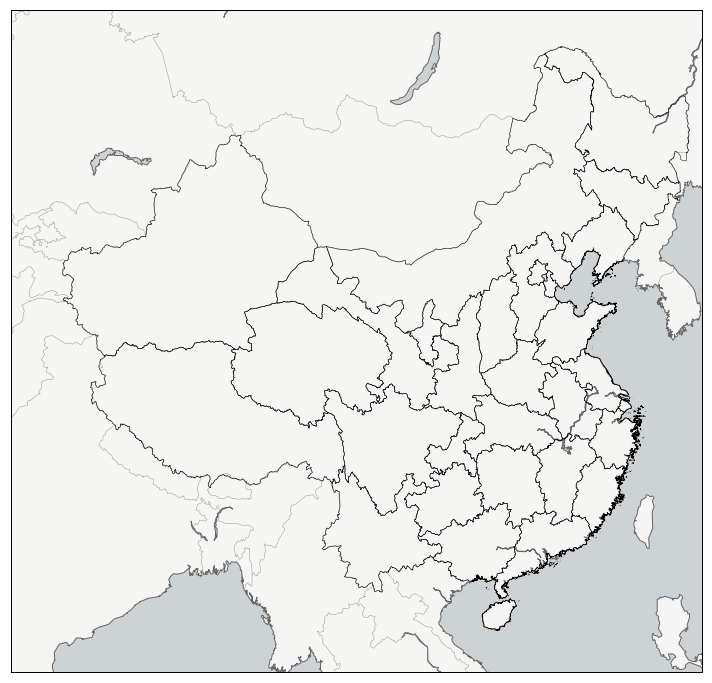

In [32]:
draw_map()  # 

中国国土东西跨度5200km，南北跨度5500km，经度73-135，维度3-53